## Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
df = pd.read_csv("Updated_reviews.csv")
df.head()

,Product Name,Review Text,Review Rating,Date
0,Airdopes 141,Writing this after an year\r\n\r\nI’ve been us...,5,03-10-2024
1,Airdopes 141,"Pros:\r\n1. The level of volume it gets to, is...",4,02-01-2023
2,Airdopes 141,Pros>\r\nOnly sound quality is good.\r\nDurabl...,3,28-09-2024
3,Airdopes 141,Earbud rubber is too thin. It won't fit the ea...,4,03-10-2024
4,Airdopes 141,I am writing a true review after around a week...,4,03-09-2021


### Data preprocessing

In [3]:
# Convert the 'Ratings' column to numeric values
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce')
print("Shape of DataFrame after converting 'Review Rating':", df.shape)

Shape of DataFrame after converting 'Review Rating': (21072, 4)


In [4]:
df['Sentiment'] = df['Review Rating'].apply(lambda x: 1 if x > 3 else 0)  # Positive (1), Negative (0)
df.columns

Index(['Product Name', 'Review Text', 'Review Rating', 'Date', 'Sentiment'], dtype='object')

In [5]:
df.describe()

,Review Rating,Sentiment
count,21071.000000,21072.000000
mean,3.804138,0.698890
std,1.229264,0.458752
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
# Drop rows with missing values
df = df.dropna()

# Confirm the rows with missing values have been dropped
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20825 entries, 0 to 21071
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   20825 non-null  object 
 1   Review Text    20825 non-null  object 
 2   Review Rating  20825 non-null  float64
 3   Date           20825 non-null  object 
 4   Sentiment      20825 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 976.2+ KB
None


In [7]:
df.columns

Index(['Product Name', 'Review Text', 'Review Rating', 'Date', 'Sentiment'], dtype='object')

In [8]:
# Lowercasing
df['Review Text'] = df['Review Text'].str.lower()

# Remove special characters except emojis
df['Review Text'] = df['Review Text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s\U0001F600-\U0001F64F]', '', x))

In [12]:
df.shape

(20825, 3)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Join all processed text
text = ' '.join(df['Review Text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(13, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [14]:
!pip install imblearn

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pandas as pd
import numpy as np


# Extract features (review texts) and labels (sentiment)
X_raw = df["Review Text"]
y = df["Sentiment"]

# Tokenize the text data
max_words = 1000  # Maximum number of words to keep in the vocabulary
max_len = 100  # Maximum length of the sequences (pad shorter ones)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_raw)
X = tokenizer.texts_to_sequences(X_raw)
X = pad_sequences(X, maxlen=max_len)

In [17]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of classes before and after applying SMOTE
print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({1: 14520, 0: 6305})
Resampled class distribution: Counter({1: 14520, 0: 14520})


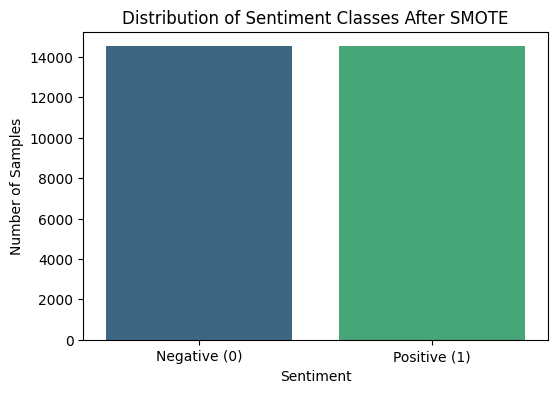

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Counter will give you the count of each class (0 and 1)
class_counts = Counter(y_resampled)

# Extract the labels and their counts
labels = list(class_counts.keys())
counts = list(class_counts.values())

# Plotting the bar plot using Seaborn for better aesthetics
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title('Distribution of Sentiment Classes After SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])  # Custom labels for x-axis
plt.show()

In [40]:
print('The shape of the resampled data:', X_resampled.shape)

The shape of the resampled data: (29040, 100)


In [49]:
print(X_resampled)

[[  0   0   0 ...   5 290  51]
 [  2  10  31 ...   5 109 549]
 [908  37  16 ...  52 204 106]
 ...
 [  0   0   0 ... 126  35 150]
 [  0   0   0 ...   6 376 134]
 [  0 211   7 ... 403   8  61]]


In [18]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [43]:
print('Training data shape:',X_train.shape)
print(X_train)

Training data shape: (23232, 100)
[[  0   0   0 ... 463   1 295]
 [  0   0   0 ... 630 338 443]
 [  0   0   0 ... 476   1 771]
 ...
 [  0   0   0 ...   0 144   8]
 [  0   0   0 ...   0  10  21]
 [  0   0   0 ...  35  78 851]]


In [44]:
print('Training data shape:',X_test.shape)
print(X_test)

Training data shape: (5808, 100)
[[  0   0   0 ...  67   7 361]
 [  0   0   0 ... 606  10 387]
 [  0   0   0 ...  44  28 426]
 ...
 [  0   0   0 ...   7  24 180]
 [  0   0   0 ... 246   7  46]
 [  7  23 148 ... 137  18  48]]


In [33]:
# Build an LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 30s 104ms/step - accuracy: 0.9235 - loss: 0.1955 - val_accuracy: 0.8797 - val_loss: 0.3001
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.9341 - loss: 0.1738 - val_accuracy: 0.8866 - val_loss: 0.2997
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.9362 - loss: 0.1689 - val_accuracy: 0.8905 - val_loss: 0.3067
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9446 - loss: 0.1499 - val_accuracy: 0.8961 - val_loss: 0.2985
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.9481 - loss: 0.1424 - val_accuracy: 0.8933 - val_loss: 0.3120


182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9094 - loss: 0.2689


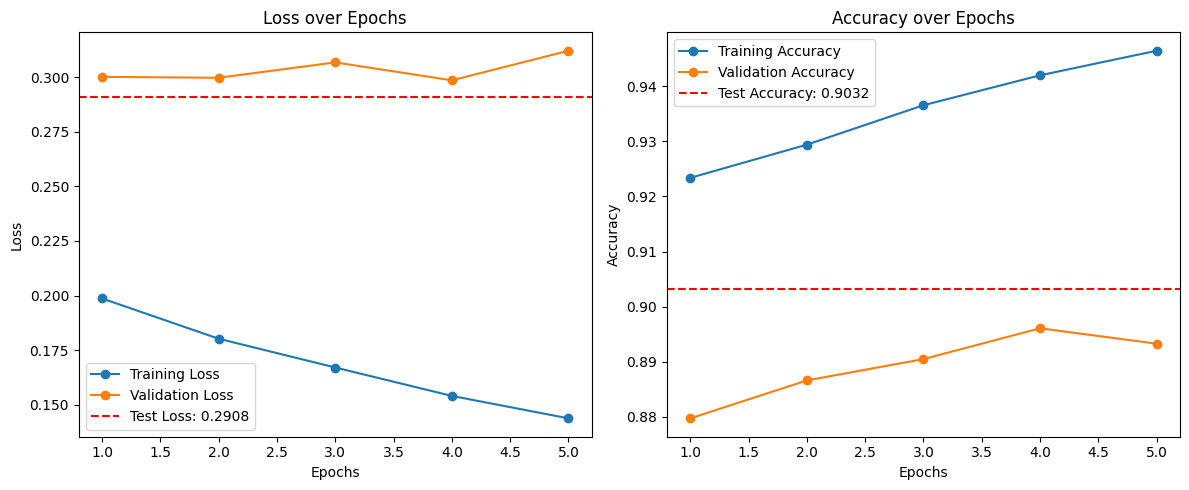

In [31]:
import matplotlib.pyplot as plt

# Evaluate on test data to get test loss and test accuracy
loss, accuracy = model.evaluate(X_test, y_test)

# Extract history values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.axhline(y=loss, color='r', linestyle='--', label=f'Test Loss: {loss:.4f}')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Test Accuracy: {accuracy:.4f}')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100:.2f}%")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9094 - loss: 0.2689
Test Loss: 29.08%
Test Accuracy: 90.32%


In [22]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [24]:
new_review = "Not so good product. After 2 weeks, one side stopped working. Service center also not helpful. Waste of money"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
The sentiment of the review is: negative


In [ ]:
from keras.models import load_model

# Save the model to the specified directory
model.save('sentiment_analysis_model_main.h5')

# Load the model from the HDF5 file
model = load_model('sentiment_analysis_model_main.h5')

In [ ]:
import pickle

# Save the tokenizer to a local file
with open('main_tokenizer.pickle', 'wb') as handle:  # Save in the current directory
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully!")

In [ ]:
# Load the tokenizer from the pickle file
with open('main_tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print("Tokenizer loaded successfully!")